# 1. Introduction 
Data Set Problems 🤔

👉 The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

### Objectives of Notebook 📌

👉 This notebook aims to:

    - Analyze customer data provided in data set (EDA)
    - Build various ML models that can predict loan approval

### 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 3. Reading Data Set 👓
👉 After importing libraries, we will also import the dataset that will be used.

In [2]:
loan_data = pd.read_csv('loan_train.csv')

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
loan_data.shape #shape of data

(614, 13)

In [6]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Describe Numerical Variable 🔎
👉 This section will show mean, count, std, min, max and others using describe function.

In [8]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


 ### Null Values 🚫

In [9]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
loan_data['Gender'] = loan_data['Gender'].map({'Male':0, 'Female': 1})
loan_data['Married'] = loan_data['Married'].map({'No': 0, 'Yes': 1})
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'N':0, 'Y': 1})

In [11]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [12]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


### Categorical Variables 📊
👉 In this section, the imputation for categorical variables will be performed using mode.

In [13]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [14]:
loan_data["Married"] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])

In [15]:
loan_data['Dependents'] = loan_data["Dependents"].fillna(loan_data['Dependents'].mode()[0])

In [16]:
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [17]:
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

In [18]:
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mode()[0])

In [19]:
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])

# Data Exploration 🔍
👉 This section will perform data exploration of "raw" data set that has been imported.

## Categorical Variable 📊
👉 The first type of variable that I will explore is categorical variable.

In [20]:
loan_data['Gender'].value_counts()

0.0    502
1.0    112
Name: Gender, dtype: int64

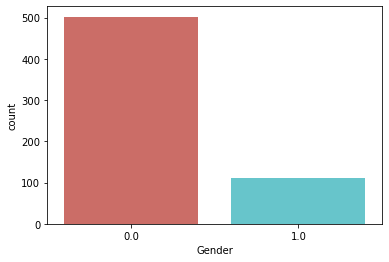

In [21]:
sns.countplot(x='Gender', data=loan_data, palette='hls')
plt.show()

👉 From the results above, the number of male applicants is higher compared to female applicants.

In [22]:
loan_data['LoanAmount'].value_counts()

120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [23]:
loan_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

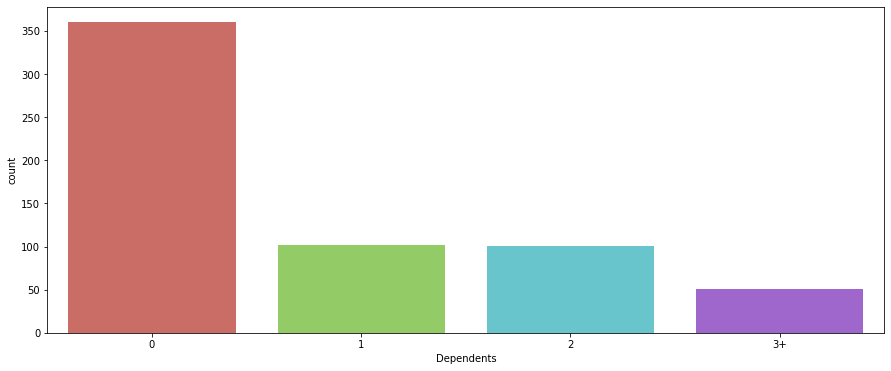

In [24]:
plt.figure(figsize=(15, 6))
sns.countplot('Dependents', data=loan_data, palette='hls')
plt.show()

In [25]:
loan_data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

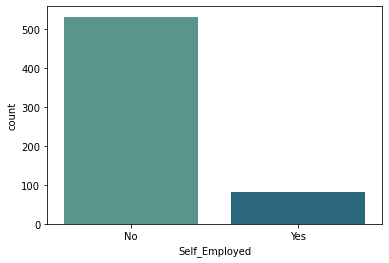

In [26]:
sns.countplot(x="Self_Employed", data=loan_data, palette="crest")
plt.show()

👉 The number of applicants that are not self employed is higher compared to applicants that are self employed.

In [27]:
CountNo = len(loan_data[loan_data.Self_Employed== 'No'])
CountYes = len(loan_data[loan_data.Self_Employed == 'Yes'])

In [28]:
print('Persentage of Not Self employed : {:.2f}%' .format((CountNo / (len(loan_data.Self_Employed))*100)))
print('Persentage of Self employed : {:.2f}%' .format((CountYes / (len(loan_data.Self_Employed))*100)))

Persentage of Not Self employed : 86.64%
Persentage of Self employed : 13.36%


👉 The number of applicants that are not self employed is higher compared to applicants that are self employed.

In [29]:
loan_data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

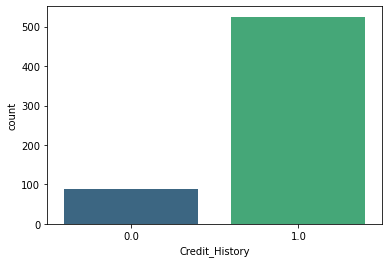

In [30]:
sns.countplot(x="Credit_History", data=loan_data, palette="viridis")
plt.show()

👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history.

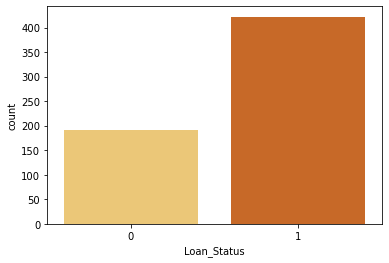

In [31]:
sns.countplot(x="Loan_Status", data=loan_data, palette="YlOrBr")
plt.show()

👉 The number of approved loans is higher compared to rejected loans 

In [32]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

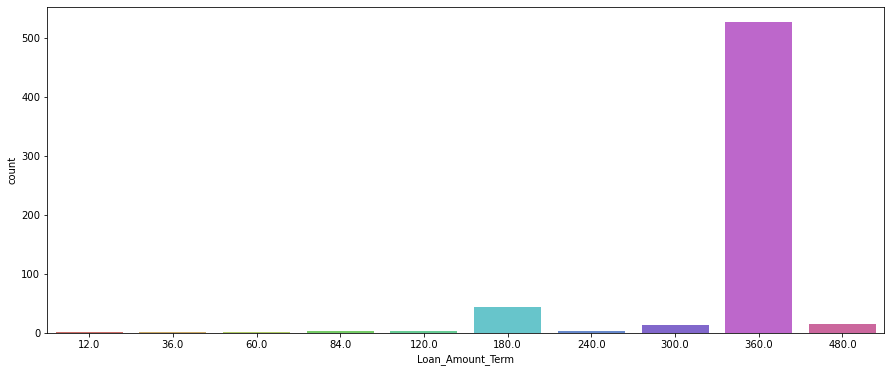

In [33]:
plt.figure(figsize=(15,6))
sns.countplot('Loan_Amount_Term', data=loan_data, palette='hls')
plt.show()

👉  As can be seen from the results, the 360 days loan duration is the most popular compared to others.

# Other Exploration 💹
👉 This section will show additional exploration from each variables. The additional exploration are:

    - Bivariate analysis (categorical- categorical,  Categorical- Numerical)

    - Heatmap

# Categorical 📊 - Categorical 📊

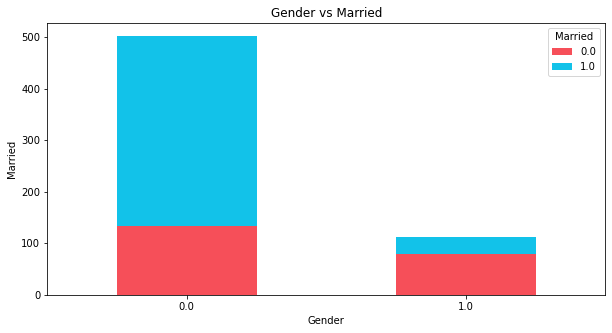

In [34]:
pd.crosstab(loan_data.Gender, loan_data.Married).plot(kind = 'bar', stacked = True, figsize = (10,5),color = ['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Married')
plt.xticks(rotation = 0)
plt.show()

👉 Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

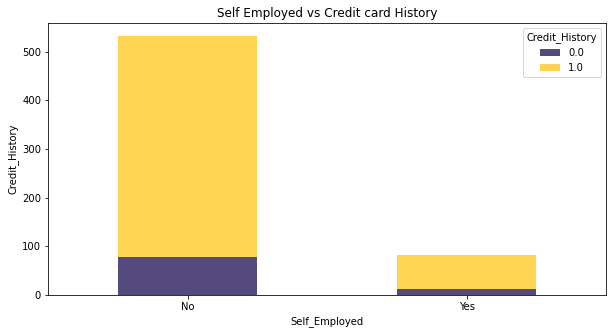

In [35]:
pd.crosstab(loan_data.Self_Employed, loan_data.Credit_History).plot(kind ='bar' , stacked=True, figsize=(10,5), color=['#544a7d', '#ffd452'])
plt.title("Self Employed vs Credit card History")
plt.xlabel('Self_Employed')
plt.ylabel('Credit_History')
plt.xticks(rotation=0)
plt.show()

👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history.

## Heatmap 🔥

<AxesSubplot:>

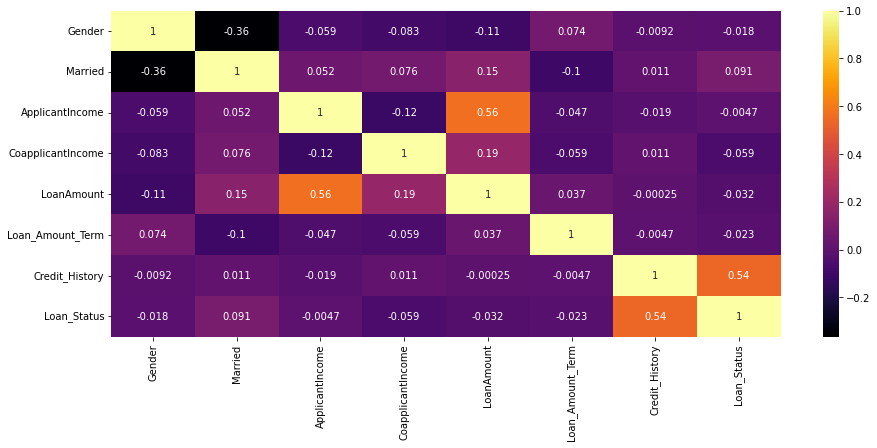

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(loan_data.corr(), annot=True, cmap= 'inferno')

👉 There is positive correlation between Loan Amount and Applicant Income

 ## Categorical 📊- Numerical 📈

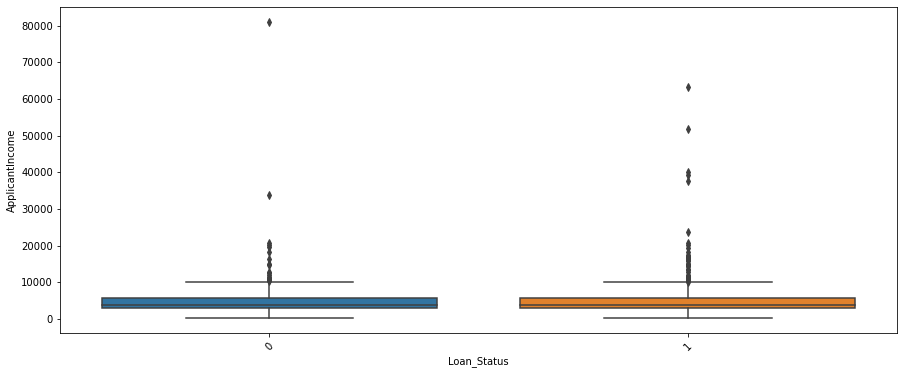

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=loan_data)
plt.xticks(rotation=45)
plt.show()

👉 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

<Figure size 1080x432 with 0 Axes>

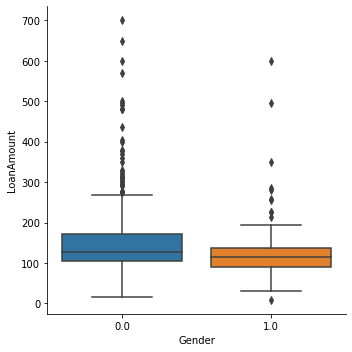

In [38]:
plt.figure(figsize=(15,6))
sns.catplot(x='Gender',y='LoanAmount', data=loan_data, kind="box")
plt.show()

### Features Separating ➗
👉 Dependent features (Loan_Status) will be seperated from independent features.

In [39]:
x = loan_data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount','Credit_History']]
y = loan_data.Loan_Status

In [40]:
x.shape, y.shape

((614, 5), (614,))

### Splitting Data Set 🪓
👉 The data set will be split into 75% train and 25% test.

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Models 🛠

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [56]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x_train,y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LRAcc = accuracy_score(y_pred, y_test)
print('LR accuracy : {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.73      1.00      0.85       113

    accuracy                           0.73       154
   macro avg       0.37      0.50      0.42       154
weighted avg       0.54      0.73      0.62       154

[[  0  41]
 [  0 113]]
LR accuracy : 73.38%


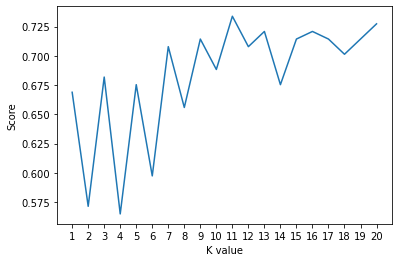

KNN best accuracy: 73.38%


In [61]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [62]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.73      1.00      0.85       113

    accuracy                           0.73       154
   macro avg       0.37      0.50      0.42       154
weighted avg       0.54      0.73      0.62       154

[[  0  41]
 [  0 113]]
SVC accuracy: 73.38%


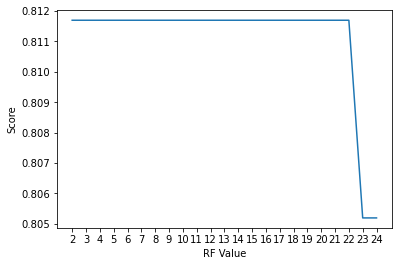

Random Forest Accuracy:  81.17%


In [63]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [69]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(x_train, y_train)

y_pred = NBclassifier1.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.93      0.32      0.47        41
           1       0.80      0.99      0.89       113

    accuracy                           0.81       154
   macro avg       0.86      0.65      0.68       154
weighted avg       0.83      0.81      0.78       154

[[ 13  28]
 [  1 112]]
Categorical Naive Bayes accuracy: 81.17%


In [64]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [66]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(x_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [68]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.60      0.44      0.51        41
           1       0.81      0.89      0.85       113

    accuracy                           0.77       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.76      0.77      0.76       154

[[ 18  23]
 [ 12 101]]
Gradient Boosting accuracy: 77.27%


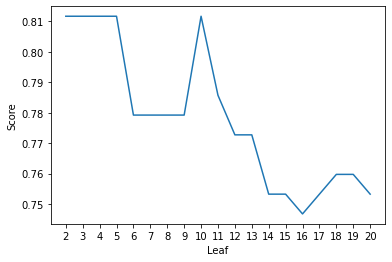

Decision Tree Accuracy: 81.17%


In [70]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

👉 In general, it can be seen that all models can achieve up to 70% accuracy.

👉 The highest accuracy is 81%.